In [1]:
import pandas as pd

In [2]:
ai_job = pd.read_csv(r"C:\Users\User\Desktop\IronHack\Week_4\Project\first_project\data\raw\ai_job_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\IronHack\\Week_4\\Project\\first_project\\data\\raw\\ai_job_dataset.csv'

In [ ]:
ai_job.head()

In [14]:
ai_job.shape

(15000, 19)

In [13]:
ai_job.duplicated().value_counts()

False    15000
Name: count, dtype: int64

In [89]:
ai_job.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [17]:
ai_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [18]:
ai_job.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [31]:
ai_job['company_location'].nunique()

20

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.cm

In [163]:
ai_job['job_title'].nunique()

20

In [120]:
ai_job['posting_date'].nunique()

486

In [ ]:
# Time of the year with more job postings.

In [ ]:
# posting_date	
# job title


In [134]:
ai_job['job_title'].value_counts()

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

In [128]:
ai_job['month'] = ai_job['posting_date'].str[5:7]

In [152]:
count_date_title = ai_job.groupby('month')['job_title'].count().reset_index()

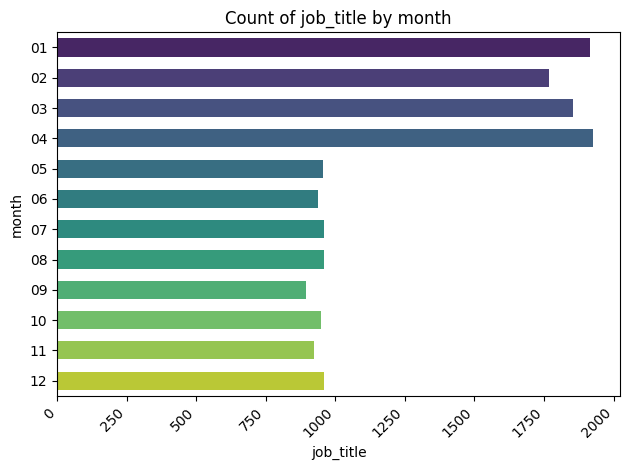

In [153]:
sns.barplot(x='job_title', y='month',hue='month', data=count_date_title,width=0.6,palette='viridis')
plt.title('Count of job_title by month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [180]:
data_analyst = ai_job[ai_job['job_title'] == 'Data Analyst']

In [183]:
count_title_date = data_analyst.groupby('month')['job_title'].value_counts().reset_index()

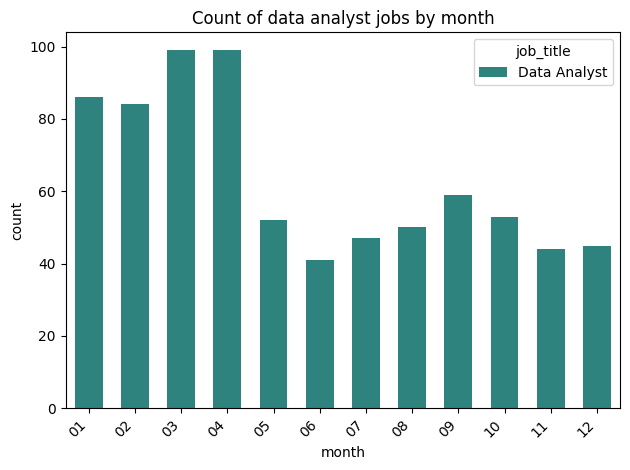

In [197]:
sns.barplot(x='month', y='count',hue='job_title', data=count_title_date,width=0.6,palette='viridis')
plt.title('Count of data analyst jobs by month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [208]:
count_title = [ai_job['job_title'].value_counts()]

In [209]:
count_title

[job_title
 Machine Learning Researcher    808
 AI Software Engineer           784
 Autonomous Systems Engineer    777
 Machine Learning Engineer      772
 AI Architect                   771
 Head of AI                     765
 NLP Engineer                   762
 Robotics Engineer              759
 Data Analyst                   759
 AI Research Scientist          756
 Data Engineer                  749
 AI Product Manager             743
 Research Scientist             742
 Principal Data Scientist       734
 AI Specialist                  728
 ML Ops Engineer                725
 Computer Vision Engineer       724
 Data Scientist                 720
 Deep Learning Engineer         718
 AI Consultant                  704
 Name: count, dtype: int64]

In [66]:
ai_job['industry'].nunique()

15

In [67]:
mean_industry_benefit = ai_job.groupby('industry')['benefits_score'].mean().reset_index()

In [213]:
monthly_postings = ai_job.resample('month', on='posting_date')['job_id'].count()
monthly_postings.plot()
plt.title('Job Postings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Jobs Posted')
plt.grid(True)
plt.show()

ValueError: Invalid frequency: month, failed to parse with error message: ValueError("Invalid frequency: MONTH, failed to parse with error message: KeyError('MONTH')")